# Simulation Mini Project 1: Pandemic Flu Spread

Firstly, we start by creating a pandas DataFrame to store and keep track of our simulation.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Initialize variable
zero = np.zeros(21,dtype='int8')

# Prepare the initial dataframe
names = ['Tommy','Sophia','Liam','Olivia','Noah','Riley','Jackson','Emma','Aiden', 'Ava',
         'Elijah','Isabella','Grayson','Aria','Lucas','Aaliyah','Oliver','Amelia','Cayden','Mia','Jayden']

kids = pd.DataFrame({'names':names,'infected': zero,'infection_days_left': 
                     zero,'immunity_countdown':zero,'random_no':zero, 
                     "prob_infected":zero})
kids.loc[kids["names"]=="Tommy","infected"] = 1
kids.loc[kids["names"]=="Tommy","infection_days_left"] = 3
kids_starting = kids.copy()
print("Table at time = 0 (Initial Table)")
kids[["names","infected","infection_days_left","immunity_countdown","random_no"]]

Table at time = 0 (Initial Table)


,names,infected,infection_days_left,immunity_countdown,random_no
0,Tommy,1,3,0,0
1,Sophia,0,0,0,0
2,Liam,0,0,0,0
3,Olivia,0,0,0,0
4,Noah,0,0,0,0
5,Riley,0,0,0,0
6,Jackson,0,0,0,0
7,Emma,0,0,0,0
8,Aiden,0,0,0,0
9,Ava,0,0,0,0


Next, we create functions to help us with our simulation. 

In [2]:
def infected_or_not(df):
    # If kid is not already infected and not within immunity window, the kid will get infected 
    # if random no is less than infection probability
    if (df["random_no"] < df["prob_infected"]) and (df["infected"] == 0) and (df["immunity_countdown"] == 0):
        return 1
    
    # If the kid has recovered from an infection, set infection to 0
    elif(df["immunity_countdown"] == 3):
        return 0
    
    # If the kid is still within the 3 day infection window, the kid will still be infected
    else:
        return df["infected"]
    
def days_left(df):
    # If this is the first day of infection, start countdown 
    if (df["infected"] == 1) and (df["infection_days_left"] == 0):
        return 3
    
    # If this is not the first day of infection, reduce the no. of days left of infection by 1
    elif df["infection_days_left"] != 0: 
        return df["infection_days_left"] - 1
    
    # If the kid is not infected, retain the number of infection days left (ie. 0)
    else:
        return df["infection_days_left"]
    
def immu_days_left(df):
    # If this is the last day of infection, start immunity countdown at 4 
    # (ie. The kid will immune for 3 days starting the next day)
    if df["infection_days_left"] == 1:
        return 4
    
    # If the kid is currently within the immunity window, reduce the number of days by 1
    elif df["immunity_countdown"] != 0:
        return df["immunity_countdown"] - 1
    
    # If the kid is not within immunity window, retain current number of immunity days left (ie. 0)
    else:
        return df["immunity_countdown"]
    
def plot_graphs(x,y):
    # Create figure and axes
    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    # Plot bar plot
    ax1.bar(x, height=y)
    ax1.set_xticks(x)
    ax1.set_yticks(np.arange(0,max(y)+1,1))
    ax1.set_title("Number of Infected Kids (At the End of the Day) Over "+str(len(x))+" Days (Bar Chart)")
    ax1.set_xlabel("Day")
    ax1.set_ylabel("Nunber of Infected Kids (At the End of the Day)")

    # Plot histogram
    ax2.hist(x, weights=y, bins = len(x))
    ax2.set_xticks(np.arange(1, len(x)+1, 1.0))
    ax2.set_yticks(np.arange(0,max(y)+1,1))
    ax2.set_title("Number of Infected Kids (At the End of the Day) Over "+str(len(x))+" Days (Histogram)")
    ax2.set_xlabel("Day")
    ax2.set_ylabel("Nunber of Infected Kids (At the End of the Day)")
    

Then we create a function that will simulate one run of our simulation.

In [3]:
def simulate_flu(seed, display_tables = 0, display_graphs = 1, days = 19):  
    
    # Initialize variables
    kids = kids_starting.copy()
    kids["prob_infected"] = 0.02
    kids["random_no"] = np.random.rand(21)
    np.random.seed(seed)
    no_infected = 1
    y = []
    x = []

    # Simulate pandemic for 19 days
    for d in range(1,days+1):

        if display_tables == 1:
            print("----- Day "+str(d)+" -----")
            print("Probability infected: " + str(round(1-(1-0.02)**no_infected,4)))
        x.append(d)

        # Infect other kids
        kids["infected"] = kids.apply(infected_or_not, axis = 1)

        # Adjust the infection days left (add days for new infections and reduce days for ongoing infections)
        kids["infection_days_left"] = kids.apply(days_left, axis = 1)

        # Total number of infected kids at the end of the day
        no_infected = np.sum(kids["infected"])
        y.append(no_infected)
        if display_tables == 1:
            print("Number of infected kids at the end of the day: " +str(no_infected))

        # If the kid is already infected or currently in immunity period, set random number to none
        kids.loc[(kids["infected"]==1)&(kids["infection_days_left"]<3),"random_no"] = None
        kids.loc[kids["immunity_countdown"]!=0,"random_no"] = None

        if display_tables == 1:
            # Print end of day results (who's infected by the end of the day)
            print("\nNote: A kid that is infected today has infected = 1, infection days left = 3 and random number < infection probability")
            print("      A kid that is infected today will be infectious for the next 3 days.")
            print("      After recovery, a kid will be immune to infections for 3 days.")
            print("      The random number is NaN when the kid is already infected (1st-3rd infectious day) or within immunity period.")
            print("\nEnd of Day " + str(d) + " results (Who is infected by the end of the day?)")
            display(kids[["names","infected","infection_days_left","immunity_countdown","random_no"]])

        # Update probability of infection for the next day
        kids["prob_infected"] = 1-(1-0.02)**no_infected

        # Update random number for the next day
        kids["random_no"] = np.random.rand(21)

        # Update immunity days
        kids["immunity_countdown"] = kids.apply(immu_days_left,axis = 1)
    
    if display_graphs == 1:
        plot_graphs(x,y)
    
    return y


Now, we simulate one run of our simulation, printing the end of day results table for each day.

----- Day 1 -----
Probability infected: 0.02
Number of infected kids at the end of the day: 1

Note: A kid that is infected today has infected = 1, infection days left = 3 and random number < infection probability
      A kid that is infected today will be infectious for the next 3 days.
      After recovery, a kid will be immune to infections for 3 days.
      The random number is NaN when the kid is already infected (1st-3rd infectious day) or within immunity period.

End of Day 1 results (Who is infected by the end of the day?)


,names,infected,infection_days_left,immunity_countdown,random_no
0,Tommy,1,2,0,NaN
1,Sophia,0,0,0,0.695648
2,Liam,0,0,0,0.418818
3,Olivia,0,0,0,0.245653
4,Noah,0,0,0,0.658424
5,Riley,0,0,0,0.258436
6,Jackson,0,0,0,0.106129
7,Emma,0,0,0,0.837076
8,Aiden,0,0,0,0.122444
9,Ava,0,0,0,0.842895


----- Day 2 -----
Probability infected: 0.02
Number of infected kids at the end of the day: 2

Note: A kid that is infected today has infected = 1, infection days left = 3 and random number < infection probability
      A kid that is infected today will be infectious for the next 3 days.
      After recovery, a kid will be immune to infections for 3 days.
      The random number is NaN when the kid is already infected (1st-3rd infectious day) or within immunity period.

End of Day 2 results (Who is infected by the end of the day?)


,names,infected,infection_days_left,immunity_countdown,random_no
0,Tommy,1,1,0,NaN
1,Sophia,0,0,0,0.720324
2,Liam,1,3,0,0.000114
3,Olivia,0,0,0,0.302333
4,Noah,0,0,0,0.146756
5,Riley,0,0,0,0.092339
6,Jackson,0,0,0,0.186260
7,Emma,0,0,0,0.345561
8,Aiden,0,0,0,0.396767
9,Ava,0,0,0,0.538817


----- Day 3 -----
Probability infected: 0.0396
Number of infected kids at the end of the day: 4

Note: A kid that is infected today has infected = 1, infection days left = 3 and random number < infection probability
      A kid that is infected today will be infectious for the next 3 days.
      After recovery, a kid will be immune to infections for 3 days.
      The random number is NaN when the kid is already infected (1st-3rd infectious day) or within immunity period.

End of Day 3 results (Who is infected by the end of the day?)


,names,infected,infection_days_left,immunity_countdown,random_no
0,Tommy,1,0,4,NaN
1,Sophia,0,0,0,0.313424
2,Liam,1,2,0,NaN
3,Olivia,0,0,0,0.876389
4,Noah,0,0,0,0.894607
5,Riley,0,0,0,0.085044
6,Jackson,1,3,0,0.039055
7,Emma,0,0,0,0.169830
8,Aiden,0,0,0,0.878143
9,Ava,0,0,0,0.098347


----- Day 4 -----
Probability infected: 0.0776
Number of infected kids at the end of the day: 5

Note: A kid that is infected today has infected = 1, infection days left = 3 and random number < infection probability
      A kid that is infected today will be infectious for the next 3 days.
      After recovery, a kid will be immune to infections for 3 days.
      The random number is NaN when the kid is already infected (1st-3rd infectious day) or within immunity period.

End of Day 4 results (Who is infected by the end of the day?)


,names,infected,infection_days_left,immunity_countdown,random_no
0,Tommy,0,0,3,NaN
1,Sophia,0,0,0,0.789279
2,Liam,1,1,0,NaN
3,Olivia,0,0,0,0.447894
4,Noah,0,0,0,0.908596
5,Riley,0,0,0,0.293614
6,Jackson,1,2,0,NaN
7,Emma,0,0,0,0.130029
8,Aiden,1,3,0,0.019367
9,Ava,0,0,0,0.678836


----- Day 5 -----
Probability infected: 0.0961
Number of infected kids at the end of the day: 6

Note: A kid that is infected today has infected = 1, infection days left = 3 and random number < infection probability
      A kid that is infected today will be infectious for the next 3 days.
      After recovery, a kid will be immune to infections for 3 days.
      The random number is NaN when the kid is already infected (1st-3rd infectious day) or within immunity period.

End of Day 5 results (Who is infected by the end of the day?)


,names,infected,infection_days_left,immunity_countdown,random_no
0,Tommy,0,0,2,NaN
1,Sophia,1,3,0,0.049953
2,Liam,1,0,4,NaN
3,Olivia,0,0,0,0.663795
4,Noah,0,0,0,0.514889
5,Riley,0,0,0,0.944595
6,Jackson,1,1,0,NaN
7,Emma,0,0,0,0.903402
8,Aiden,1,2,0,NaN
9,Ava,0,0,0,0.139276


----- Day 6 -----
Probability infected: 0.1142
Number of infected kids at the end of the day: 6

Note: A kid that is infected today has infected = 1, infection days left = 3 and random number < infection probability
      A kid that is infected today will be infectious for the next 3 days.
      After recovery, a kid will be immune to infections for 3 days.
      The random number is NaN when the kid is already infected (1st-3rd infectious day) or within immunity period.

End of Day 6 results (Who is infected by the end of the day?)


,names,infected,infection_days_left,immunity_countdown,random_no
0,Tommy,0,0,1,NaN
1,Sophia,1,2,0,NaN
2,Liam,0,0,3,NaN
3,Olivia,0,0,0,0.964840
4,Noah,0,0,0,0.663441
5,Riley,0,0,0,0.621696
6,Jackson,1,0,4,NaN
7,Emma,0,0,0,0.949489
8,Aiden,1,1,0,NaN
9,Ava,0,0,0,0.578390


----- Day 7 -----
Probability infected: 0.1142
Number of infected kids at the end of the day: 7

Note: A kid that is infected today has infected = 1, infection days left = 3 and random number < infection probability
      A kid that is infected today will be infectious for the next 3 days.
      After recovery, a kid will be immune to infections for 3 days.
      The random number is NaN when the kid is already infected (1st-3rd infectious day) or within immunity period.

End of Day 7 results (Who is infected by the end of the day?)


,names,infected,infection_days_left,immunity_countdown,random_no
0,Tommy,0,0,0,0.623360
1,Sophia,1,1,0,NaN
2,Liam,0,0,2,NaN
3,Olivia,0,0,0,0.690897
4,Noah,0,0,0,0.997323
5,Riley,0,0,0,0.172341
6,Jackson,0,0,3,NaN
7,Emma,0,0,0,0.932595
8,Aiden,1,0,4,NaN
9,Ava,1,3,0,0.066000


----- Day 8 -----
Probability infected: 0.1319
Number of infected kids at the end of the day: 8

Note: A kid that is infected today has infected = 1, infection days left = 3 and random number < infection probability
      A kid that is infected today will be infectious for the next 3 days.
      After recovery, a kid will be immune to infections for 3 days.
      The random number is NaN when the kid is already infected (1st-3rd infectious day) or within immunity period.

End of Day 8 results (Who is infected by the end of the day?)


,names,infected,infection_days_left,immunity_countdown,random_no
0,Tommy,0,0,0,0.552822
1,Sophia,1,0,4,NaN
2,Liam,0,0,1,NaN
3,Olivia,0,0,0,0.279184
4,Noah,0,0,0,0.585759
5,Riley,0,0,0,0.969596
6,Jackson,0,0,2,NaN
7,Emma,1,3,0,0.018647
8,Aiden,0,0,3,NaN
9,Ava,1,2,0,NaN


----- Day 9 -----
Probability infected: 0.1492
Number of infected kids at the end of the day: 9

Note: A kid that is infected today has infected = 1, infection days left = 3 and random number < infection probability
      A kid that is infected today will be infectious for the next 3 days.
      After recovery, a kid will be immune to infections for 3 days.
      The random number is NaN when the kid is already infected (1st-3rd infectious day) or within immunity period.

End of Day 9 results (Who is infected by the end of the day?)


,names,infected,infection_days_left,immunity_countdown,random_no
0,Tommy,0,0,0,0.712989
1,Sophia,0,0,3,NaN
2,Liam,1,3,0,0.012556
3,Olivia,1,3,0,0.071974
4,Noah,0,0,0,0.967276
5,Riley,0,0,0,0.568100
6,Jackson,0,0,1,NaN
7,Emma,1,2,0,NaN
8,Aiden,0,0,2,NaN
9,Ava,1,1,0,NaN


----- Day 10 -----
Probability infected: 0.1663
Number of infected kids at the end of the day: 9

Note: A kid that is infected today has infected = 1, infection days left = 3 and random number < infection probability
      A kid that is infected today will be infectious for the next 3 days.
      After recovery, a kid will be immune to infections for 3 days.
      The random number is NaN when the kid is already infected (1st-3rd infectious day) or within immunity period.

End of Day 10 results (Who is infected by the end of the day?)


,names,infected,infection_days_left,immunity_countdown,random_no
0,Tommy,0,0,0,0.606329
1,Sophia,0,0,2,NaN
2,Liam,1,2,0,NaN
3,Olivia,1,2,0,NaN
4,Noah,0,0,0,0.579745
5,Riley,0,0,0,0.380141
6,Jackson,0,0,0,0.550948
7,Emma,1,1,0,NaN
8,Aiden,0,0,1,NaN
9,Ava,1,0,4,NaN


----- Day 11 -----
Probability infected: 0.1663
Number of infected kids at the end of the day: 6

Note: A kid that is infected today has infected = 1, infection days left = 3 and random number < infection probability
      A kid that is infected today will be infectious for the next 3 days.
      After recovery, a kid will be immune to infections for 3 days.
      The random number is NaN when the kid is already infected (1st-3rd infectious day) or within immunity period.

End of Day 11 results (Who is infected by the end of the day?)


,names,infected,infection_days_left,immunity_countdown,random_no
0,Tommy,0,0,0,0.924808
1,Sophia,0,0,1,NaN
2,Liam,1,1,0,NaN
3,Olivia,1,1,0,NaN
4,Noah,0,0,0,0.772178
5,Riley,0,0,0,0.907816
6,Jackson,0,0,0,0.931972
7,Emma,1,0,4,NaN
8,Aiden,0,0,0,0.234362
9,Ava,0,0,3,NaN


----- Day 12 -----
Probability infected: 0.1142
Number of infected kids at the end of the day: 4

Note: A kid that is infected today has infected = 1, infection days left = 3 and random number < infection probability
      A kid that is infected today will be infectious for the next 3 days.
      After recovery, a kid will be immune to infections for 3 days.
      The random number is NaN when the kid is already infected (1st-3rd infectious day) or within immunity period.

End of Day 12 results (Who is infected by the end of the day?)


,names,infected,infection_days_left,immunity_countdown,random_no
0,Tommy,0,0,0,0.394876
1,Sophia,0,0,0,0.963263
2,Liam,1,0,4,NaN
3,Olivia,1,0,4,NaN
4,Noah,0,0,0,0.135079
5,Riley,0,0,0,0.505662
6,Jackson,1,3,0,0.021525
7,Emma,0,0,3,NaN
8,Aiden,0,0,0,0.827115
9,Ava,0,0,2,NaN


----- Day 13 -----
Probability infected: 0.0776
Number of infected kids at the end of the day: 3

Note: A kid that is infected today has infected = 1, infection days left = 3 and random number < infection probability
      A kid that is infected today will be infectious for the next 3 days.
      After recovery, a kid will be immune to infections for 3 days.
      The random number is NaN when the kid is already infected (1st-3rd infectious day) or within immunity period.

End of Day 13 results (Who is infected by the end of the day?)


,names,infected,infection_days_left,immunity_countdown,random_no
0,Tommy,0,0,0,0.546347
1,Sophia,0,0,0,0.798604
2,Liam,0,0,3,NaN
3,Olivia,0,0,3,NaN
4,Noah,0,0,0,0.599110
5,Riley,1,3,0,0.015533
6,Jackson,1,2,0,NaN
7,Emma,0,0,2,NaN
8,Aiden,0,0,0,0.807361
9,Ava,0,0,1,NaN


----- Day 14 -----
Probability infected: 0.0588
Number of infected kids at the end of the day: 2

Note: A kid that is infected today has infected = 1, infection days left = 3 and random number < infection probability
      A kid that is infected today will be infectious for the next 3 days.
      After recovery, a kid will be immune to infections for 3 days.
      The random number is NaN when the kid is already infected (1st-3rd infectious day) or within immunity period.

End of Day 14 results (Who is infected by the end of the day?)


,names,infected,infection_days_left,immunity_countdown,random_no
0,Tommy,0,0,0,0.376580
1,Sophia,0,0,0,0.973784
2,Liam,0,0,2,NaN
3,Olivia,0,0,2,NaN
4,Noah,0,0,0,0.574712
5,Riley,1,2,0,NaN
6,Jackson,1,1,0,NaN
7,Emma,0,0,1,NaN
8,Aiden,0,0,0,0.750022
9,Ava,0,0,0,0.858314


----- Day 15 -----
Probability infected: 0.0396
Number of infected kids at the end of the day: 2

Note: A kid that is infected today has infected = 1, infection days left = 3 and random number < infection probability
      A kid that is infected today will be infectious for the next 3 days.
      After recovery, a kid will be immune to infections for 3 days.
      The random number is NaN when the kid is already infected (1st-3rd infectious day) or within immunity period.

End of Day 15 results (Who is infected by the end of the day?)


,names,infected,infection_days_left,immunity_countdown,random_no
0,Tommy,0,0,0,0.430247
1,Sophia,0,0,0,0.973802
2,Liam,0,0,1,NaN
3,Olivia,0,0,1,NaN
4,Noah,0,0,0,0.426701
5,Riley,1,1,0,NaN
6,Jackson,1,0,4,NaN
7,Emma,0,0,0,0.879998
8,Aiden,0,0,0,0.903842
9,Ava,0,0,0,0.662720


----- Day 16 -----
Probability infected: 0.0396
Number of infected kids at the end of the day: 1

Note: A kid that is infected today has infected = 1, infection days left = 3 and random number < infection probability
      A kid that is infected today will be infectious for the next 3 days.
      After recovery, a kid will be immune to infections for 3 days.
      The random number is NaN when the kid is already infected (1st-3rd infectious day) or within immunity period.

End of Day 16 results (Who is infected by the end of the day?)


,names,infected,infection_days_left,immunity_countdown,random_no
0,Tommy,0,0,0,0.342689
1,Sophia,0,0,0,0.068209
2,Liam,0,0,0,0.377924
3,Olivia,0,0,0,0.079626
4,Noah,0,0,0,0.982817
5,Riley,1,0,4,NaN
6,Jackson,0,0,3,NaN
7,Emma,0,0,0,0.874962
8,Aiden,0,0,0,0.688413
9,Ava,0,0,0,0.569494


----- Day 17 -----
Probability infected: 0.02
Number of infected kids at the end of the day: 0

Note: A kid that is infected today has infected = 1, infection days left = 3 and random number < infection probability
      A kid that is infected today will be infectious for the next 3 days.
      After recovery, a kid will be immune to infections for 3 days.
      The random number is NaN when the kid is already infected (1st-3rd infectious day) or within immunity period.

End of Day 17 results (Who is infected by the end of the day?)


,names,infected,infection_days_left,immunity_countdown,random_no
0,Tommy,0,0,0,0.499584
1,Sophia,0,0,0,0.728586
2,Liam,0,0,0,0.208194
3,Olivia,0,0,0,0.248034
4,Noah,0,0,0,0.851672
5,Riley,0,0,3,NaN
6,Jackson,0,0,2,NaN
7,Emma,0,0,0,0.233666
8,Aiden,0,0,0,0.101967
9,Ava,0,0,0,0.515857


----- Day 18 -----
Probability infected: 0.0
Number of infected kids at the end of the day: 0

Note: A kid that is infected today has infected = 1, infection days left = 3 and random number < infection probability
      A kid that is infected today will be infectious for the next 3 days.
      After recovery, a kid will be immune to infections for 3 days.
      The random number is NaN when the kid is already infected (1st-3rd infectious day) or within immunity period.

End of Day 18 results (Who is infected by the end of the day?)


,names,infected,infection_days_left,immunity_countdown,random_no
0,Tommy,0,0,0,0.324362
1,Sophia,0,0,0,0.872922
2,Liam,0,0,0,0.844710
3,Olivia,0,0,0,0.538441
4,Noah,0,0,0,0.866608
5,Riley,0,0,2,NaN
6,Jackson,0,0,1,NaN
7,Emma,0,0,0,0.854115
8,Aiden,0,0,0,0.098743
9,Ava,0,0,0,0.651304


----- Day 19 -----
Probability infected: 0.0
Number of infected kids at the end of the day: 0

Note: A kid that is infected today has infected = 1, infection days left = 3 and random number < infection probability
      A kid that is infected today will be infectious for the next 3 days.
      After recovery, a kid will be immune to infections for 3 days.
      The random number is NaN when the kid is already infected (1st-3rd infectious day) or within immunity period.

End of Day 19 results (Who is infected by the end of the day?)


,names,infected,infection_days_left,immunity_countdown,random_no
0,Tommy,0,0,0,0.446146
1,Sophia,0,0,0,0.782749
2,Liam,0,0,0,0.990472
3,Olivia,0,0,0,0.300248
4,Noah,0,0,0,0.143006
5,Riley,0,0,1,NaN
6,Jackson,0,0,0,0.541559
7,Emma,0,0,0,0.974740
8,Aiden,0,0,0,0.636604
9,Ava,0,0,0,0.993913


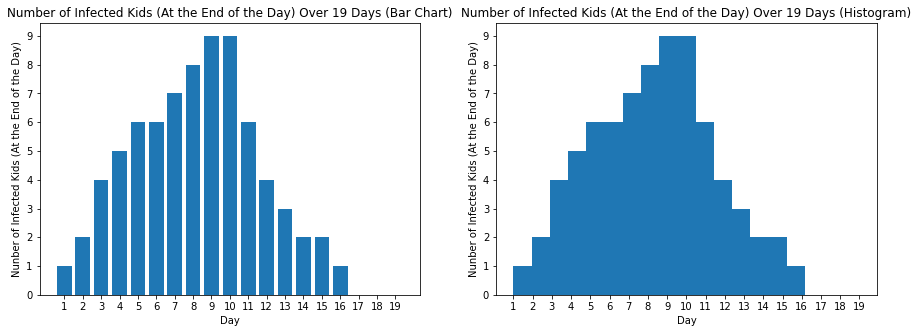

In [4]:
# Simulate one run of our simulation
_ = simulate_flu(1,1)

Now, we will repeat the simulation 10 times.

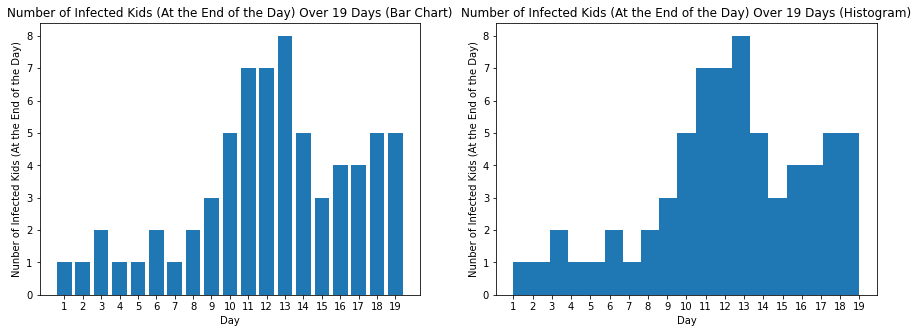

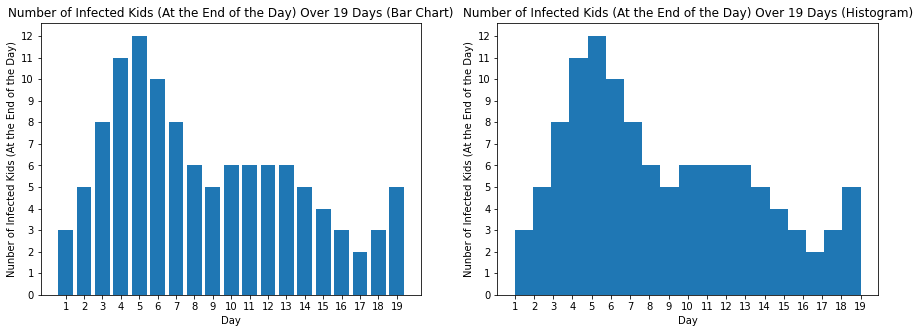

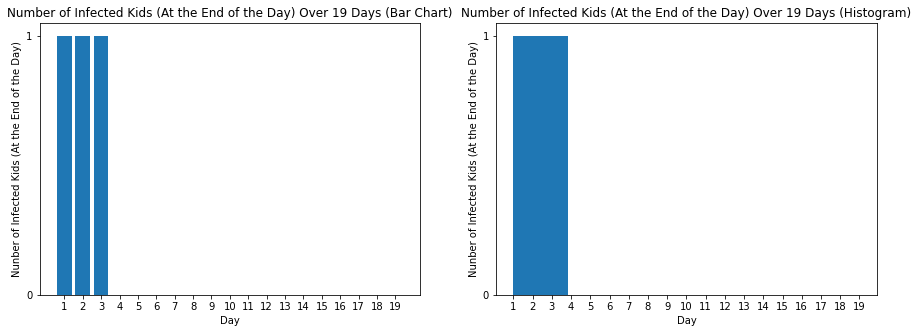

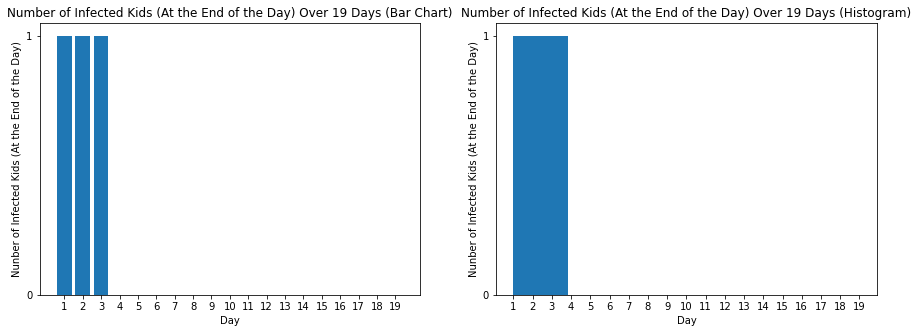

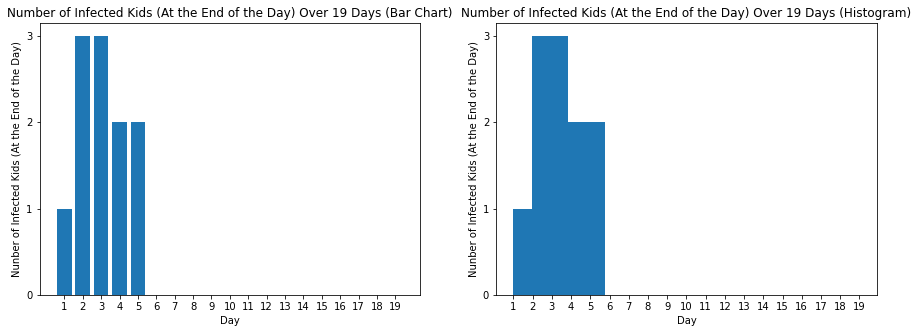

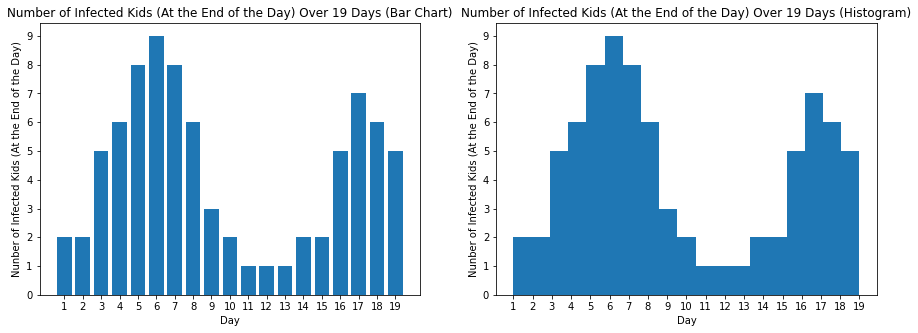

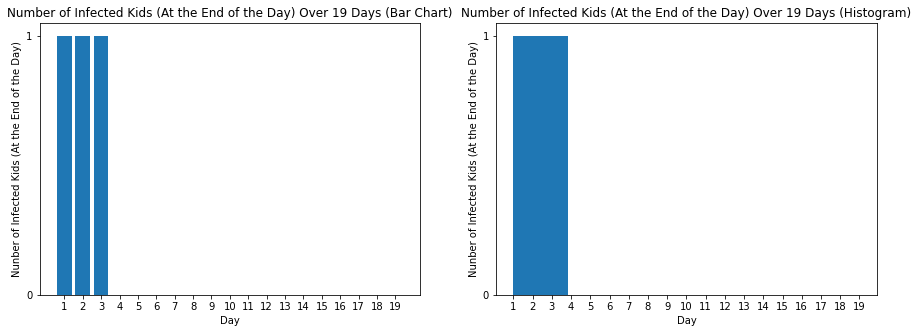

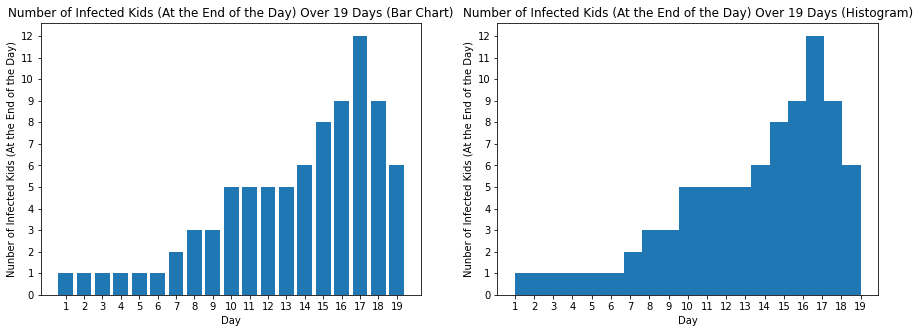

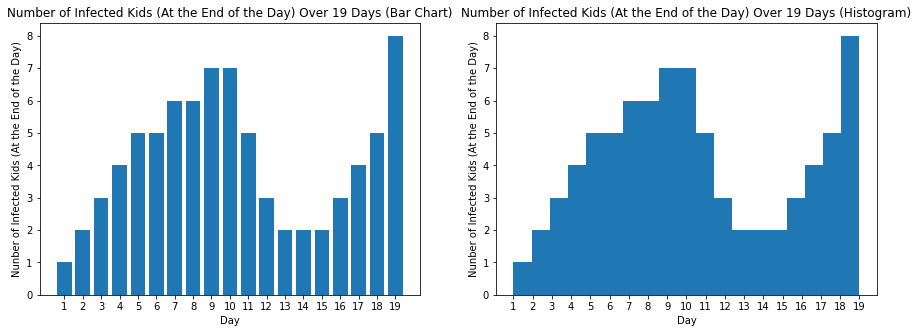

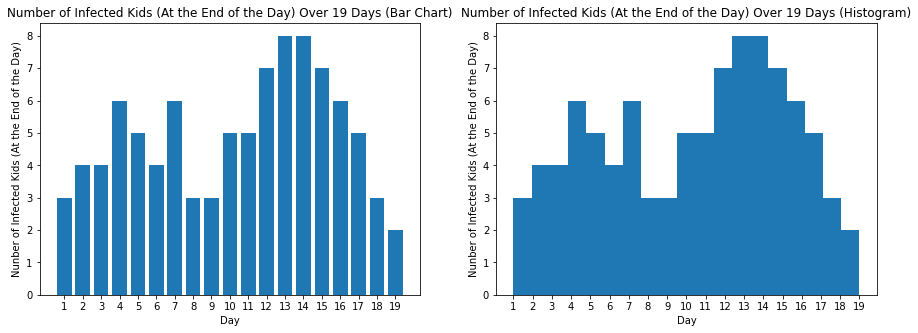

In [5]:
no_runs = 10

results = np.zeros((no_runs,19))

for k in range(0,no_runs):
    r = simulate_flu(k,0)
    results[k,:] = r

Now we take the mean of each day for the 10 runs.

(Estimated) Expected/Mean Number of Kids that are Infected on Days 1-19 (10 runs)
[1.5, 2.1, 2.9, 3.1, 3.4, 3.1, 3.1, 2.6, 2.4, 3.0, 2.9, 2.9, 3.0, 2.8, 2.6, 3.0, 3.4, 3.1, 3.1]


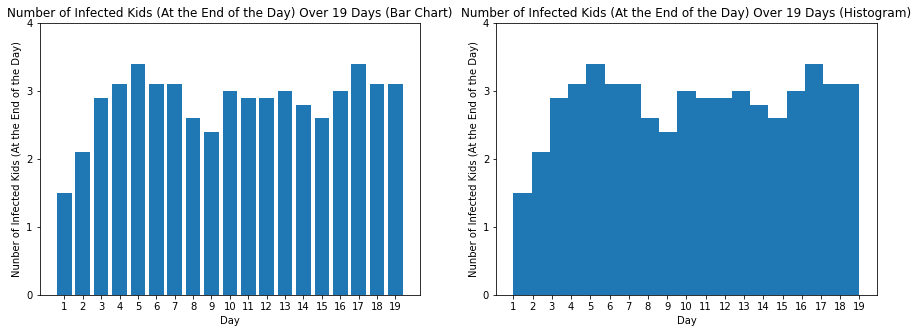

In [6]:
print("(Estimated) Expected/Mean Number of Kids that are Infected on Days 1-19 (10 runs)")
print(list(np.mean(results, axis = 0)))

plot_graphs(np.arange(1,20,1),list(np.mean(results, axis = 0)))

Then, we repeat this 50 times.

(Estimated) Expected/Mean Number of Kids that are Infected on Days 1-19 (50 runs)
[1.42, 2.04, 2.8, 2.76, 3.0, 2.92, 3.0, 2.8, 2.64, 2.82, 2.66, 2.54, 2.74, 2.8, 2.82, 2.98, 3.02, 3.0, 2.92]


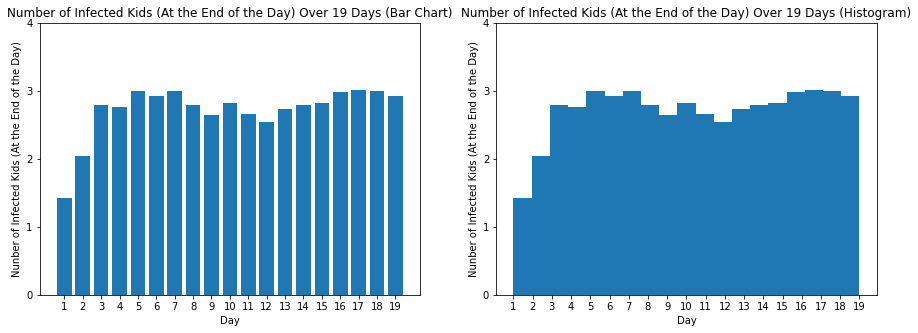

In [7]:
no_runs = 50
results = np.zeros((no_runs,19))

for k in range(0,no_runs):
    r = simulate_flu(k,0,0)
    results[k,:] = r
    
print("(Estimated) Expected/Mean Number of Kids that are Infected on Days 1-19 (50 runs)")
print(list(np.mean(results, axis = 0)))

plot_graphs(np.arange(1,20,1),list(np.mean(results, axis = 0)))

Lastly, we run our simulation 100 times.

(Estimated) Expected/Mean Number of Kids that are Infected on Days 1-19 (100 runs)
[1.36, 1.88, 2.67, 2.57, 3.0, 3.27, 3.43, 3.37, 3.32, 3.41, 3.21, 3.22, 3.25, 3.16, 3.1, 3.06, 2.96, 2.84, 2.76]


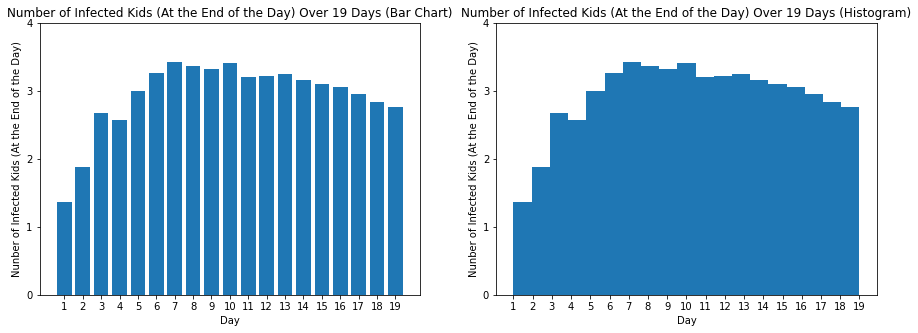

In [8]:
no_runs = 100
results = np.zeros((no_runs,19))

for k in range(0,no_runs):
    r = simulate_flu(k,0,0)
    results[k,:] = r
    
print("(Estimated) Expected/Mean Number of Kids that are Infected on Days 1-19 (100 runs)")
print(list(np.mean(results, axis = 0)))

plot_graphs(np.arange(1,20,1),list(np.mean(results, axis = 0)))

Noticing that there is a downwards slope after day 10, we decided to run our simulation over 200 days (instead of 19) to see if the epidemic eventually dies out.

(Estimated) Expected/Mean Number of Kids that are Infected on Days 1-200 (100 runs)
[1.42, 1.96, 2.68, 2.63, 3.09, 3.45, 3.78, 3.73, 3.65, 3.7, 3.4, 3.4, 3.43, 3.27, 3.29, 3.23, 3.18, 3.12, 2.99, 2.76, 2.58, 2.44, 2.44, 2.33, 2.41, 2.5, 2.55, 2.49, 2.49, 2.25, 2.05, 1.97, 1.65, 1.63, 1.54, 1.48, 1.44, 1.47, 1.37, 1.35, 1.41, 1.28, 1.21, 1.2, 1.09, 1.15, 1.18, 1.12, 1.1, 1.05, 1.08, 1.11, 1.14, 1.03, 0.95, 0.88, 0.84, 0.8, 0.76, 0.71, 0.64, 0.58, 0.48, 0.49, 0.46, 0.4, 0.41, 0.35, 0.3, 0.28, 0.28, 0.26, 0.26, 0.28, 0.26, 0.27, 0.23, 0.25, 0.2, 0.2, 0.21, 0.21, 0.23, 0.24, 0.26, 0.18, 0.24, 0.26, 0.27, 0.32, 0.26, 0.28, 0.26, 0.29, 0.34, 0.33, 0.33, 0.3, 0.28, 0.21, 0.17, 0.14, 0.09, 0.1, 0.12, 0.12, 0.14, 0.16, 0.12, 0.15, 0.13, 0.15, 0.18, 0.15, 0.16, 0.11, 0.1, 0.13, 0.14, 0.12, 0.13, 0.1, 0.11, 0.1, 0.09, 0.11, 0.1, 0.12, 0.11, 0.13, 0.12, 0.11, 0.15, 0.11, 0.11, 0.1, 0.09, 0.08, 0.11, 0.14, 0.1, 0.12, 0.08, 0.06, 0.08, 0.07, 0.06, 0.06, 0.03, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02

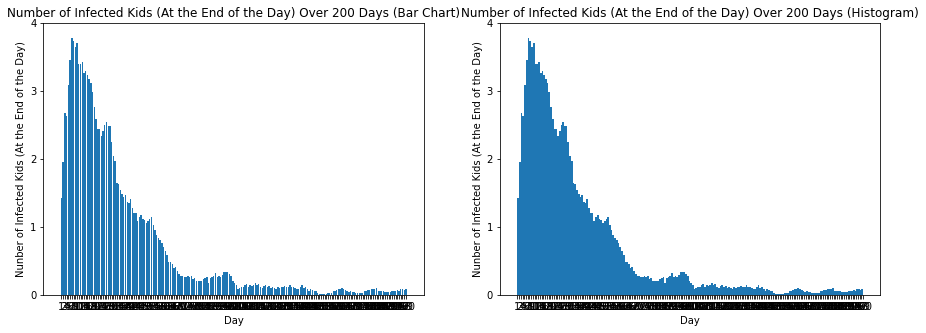

In [9]:
d = 200
no_runs = 100
results = np.zeros((no_runs,d))

for k in range(0,no_runs):
    r = simulate_flu(k,0,0,d)
    results[k,:] = r
    
print("(Estimated) Expected/Mean Number of Kids that are Infected on Days 1-"+str(d)+" (100 runs)")
print(list(np.mean(results, axis = 0)))

plot_graphs(np.arange(1,d+1,1),list(np.mean(results, axis = 0)))

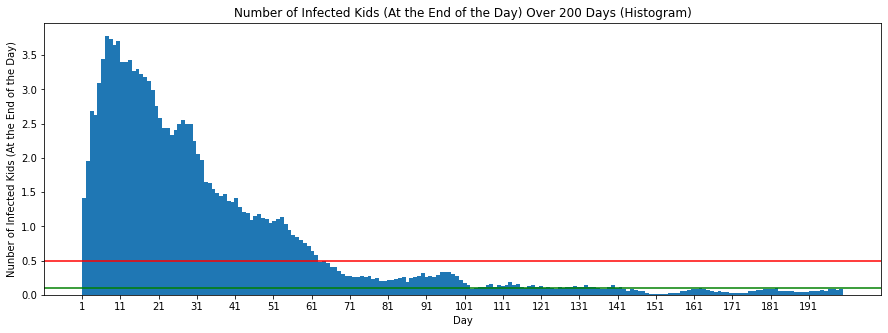

In [10]:
# Create figure and axes
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 1, 1)

# Plot histogram
ax.hist(np.arange(1,d+1,1), weights=list(np.mean(results, axis = 0)), bins = d)
ax.axhline(y=0.10, color = 'g')
ax.axhline(y=0.5, color = 'r')
ax.set_xticks(np.arange(1, d, 10))
ax.set_title("Number of Infected Kids (At the End of the Day) Over "+str(d)+" Days (Histogram)")
ax.set_xlabel("Day")
ax.set_ylabel("Nunber of Infected Kids (At the End of the Day)")
plt.show()